 # <b> Chapter 1

In [49]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

## Finding Key Conectors

In [50]:
users = [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }
]

friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

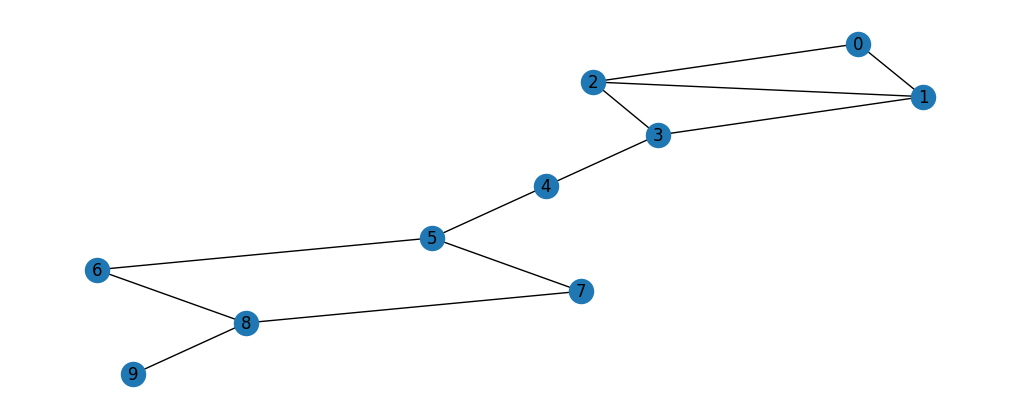

In [51]:
# Ploting the graph 

G = nx.Graph()
G.add_nodes_from([(node, {"name": name}) for node, name in users])
G.add_edges_from(friendship_pairs)
G.remove_node("id")

pos = nx.kamada_kawai_layout(G)
fig = plt.figure(1, figsize=(10, 4))
nx.draw(G, pos=pos, with_labels=True)

In [52]:
# Mapping the users and its friends

friends = {user['id']: set() for user in users}
for u in friends.keys():
    friendships = set(sum([rel for rel in friendship_pairs if u in rel], ()))
    friendships.remove(u)
    friends[u] = friendships

# Finding number of connections based on the newly created mapping

num_con = sum([len(l) for l in friends.values()])
print(f'Number of edges: {int(num_con/2)}', f'Avg. number of connections: {num_con/len(friends)}', sep='\n')
friends

Number of edges: 12
Avg. number of connections: 2.4


{0: {1, 2},
 1: {0, 2, 3},
 2: {0, 1, 3},
 3: {1, 2, 4},
 4: {3, 5},
 5: {4, 6, 7},
 6: {5, 8},
 7: {5, 8},
 8: {6, 7, 9},
 9: {8}}

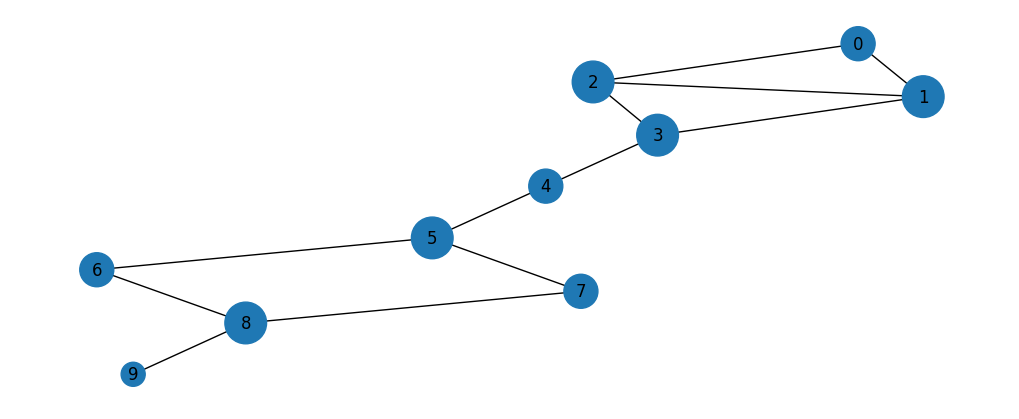

In [53]:
# Plotting the graph of most connected people w/ node sizes based on degree of node.

G = nx.Graph(friends)
fig = plt.figure(1, figsize=(10, 4))
node_sizes = [len(v) for v in friends.values()]
nx.draw(G, pos=pos, with_labels=True, node_size=[300 * size for size in node_sizes])

## Data Scientists You May Know

In [71]:
# From the idea of recomending friends of friends for a user

def friend_friends(user: int, friends: dict) -> set:
    """Gets the friends of a friend"""
    nearest = friends[user]
    if not nearest:
        return "This user has no friends :c"
    rec = set()
    for f in nearest:
        rec = rec.union(friends[f]).difference(nearest)
        rec.remove(user)
    return rec

f_user = friend_friends(5, friends)
cf_users = friends[0].union(friends[1])
cf_users-= {0, 1}
print(f'Friends of user {5}: {f_user}', f'Common friends of users {0} and {1}: {cf_users}', sep='\n')


Friends of user 5: {8, 3}
Common friends of users 0 and 1: {2, 3}
